Selection of the number of clusters

In [1]:
import pandas as pd
df=pd.read_csv('normalized_text_without_outliers.csv')
corpus = df['text'].values
df.head()

,category,text
0,business,quarterly profit u medium giant timewarner jum...
1,business,dollar hit highest level euro almost three mon...
2,business,owner embattle russian oil giant yukos ask buy...
3,business,british airway blame high fuel price drop prof...
4,business,share uk drink food firm ally domecq rise spec...


Dendrogram

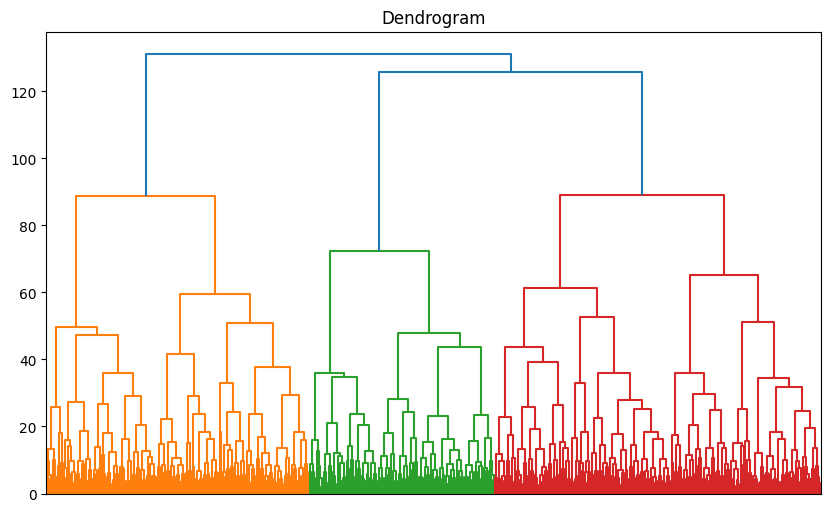

In [2]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.manifold import TSNE
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

# TF-IDF
vectorizer = TfidfVectorizer(max_df=0.9)
X = vectorizer.fit_transform(corpus)

# t-SNE dimension reduction
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X.toarray())

# Calculate distance matrix for hierarchical clustering with complete-linkage
linkage_matrix = linkage(X_tsne, method='complete')

plt.figure(figsize=(10, 6))
dendrogram(linkage_matrix, labels=df["category"].values, orientation='top')
plt.title('Dendrogram')

plt.xticks([])
plt.show()


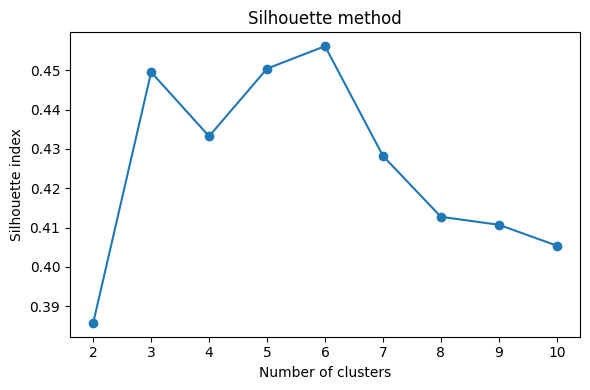

In [4]:
#-------------------Silhouette scores---------------------
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import silhouette_score


# Calculate the silhouette score
def calculate_silhouette(data, max_clusters):
    silhouette_scores = []
    for n in range(2, max_clusters + 1):
        kmeans = KMeans(n_clusters=n, random_state=42, n_init=10)
        labels = kmeans.fit_predict(data)
        silhouette_scores.append(silhouette_score(data, labels))
    return silhouette_scores

max_clusters = 10
silhouette_tsne = calculate_silhouette(X_tsne, max_clusters)

plt.figure(figsize=(6, 4))

plt.plot(range(2, max_clusters + 1), silhouette_tsne, marker='o')
plt.title('Silhouette method')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette index')

plt.tight_layout()
plt.show()


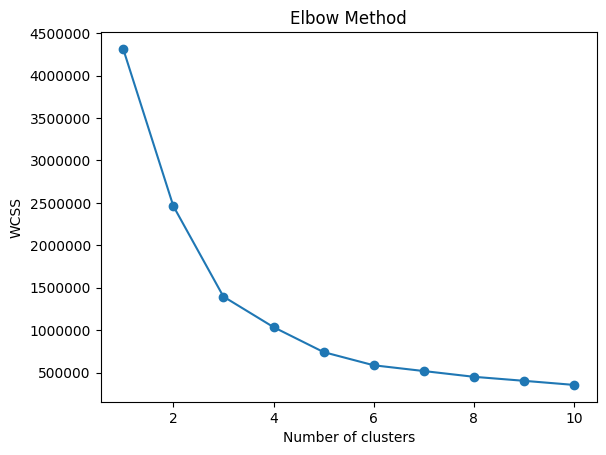

In [6]:
#---------------------elbow metod SSE-------------------
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from sklearn.feature_extraction.text import TfidfVectorizer

# count WCSS
def calculate_wcss(data, max_clusters):
    wcss = []
    for n in range(1, max_clusters + 1):
        kmeans = KMeans(n_clusters=n, random_state=42, n_init=10)
        kmeans.fit(data)
        wcss.append(kmeans.inertia_)
    return wcss

wcss_tsne = calculate_wcss(X_tsne, max_clusters)

plt.plot(range(1, max_clusters + 1), wcss_tsne, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.ticklabel_format(style='plain')




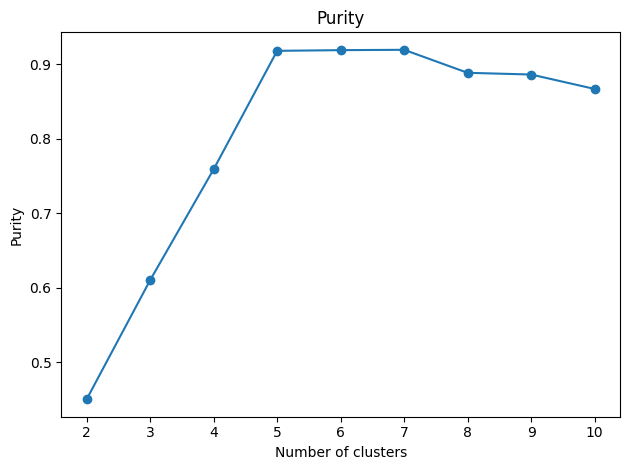

In [9]:
#-----------------------purity-------------------
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix
from sklearn.manifold import TSNE
from sklearn.preprocessing import LabelEncoder
import numpy as np
import matplotlib.pyplot as plt

# Experiment for different number of clusters
min_clusters = 2
max_clusters = 10


# A list that holds purity values
purities_tsne = []

for k in range(min_clusters, max_clusters+1):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(X_tsne)

    # counting purity
    label_encoder = LabelEncoder()
    numeric_labels = label_encoder.fit_transform(df['category'])
    confusion_mat = confusion_matrix(numeric_labels, cluster_labels)
    purity = np.sum(np.max(confusion_mat, axis=0)) / np.sum(confusion_mat)
    purities_tsne.append(purity)

plt.plot(range(min_clusters, max_clusters+1), purities_tsne, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Purity')
plt.title('Purity')

plt.tight_layout()
plt.show()


Text(0.5, 1.0, 'Entropy')

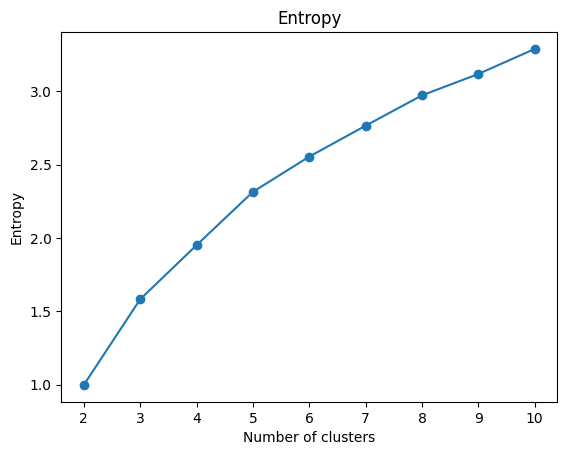

In [11]:
#-----------------------entropy--------------------------------
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix
from sklearn.manifold import TSNE
from sklearn.preprocessing import LabelEncoder
import numpy as np
import matplotlib.pyplot as plt


min_clusters = 2
max_clusters = 10

entropies_tsne = []

for k in range(min_clusters, max_clusters+1):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(X_tsne)

    label_encoder = LabelEncoder()
    numeric_labels = label_encoder.fit_transform(df['category'])
    confusion_mat = confusion_matrix(numeric_labels, cluster_labels)
    
    # counting entropy
    total_samples = np.sum(confusion_mat)
    entropy = 0
    for i in range(k):
        cluster_samples = np.sum(confusion_mat[:, i])
        if cluster_samples != 0:
            cluster_prob = cluster_samples / total_samples
            entropy += cluster_prob * np.log2(cluster_prob)
    entropy = -entropy
    entropies_tsne.append(entropy)


plt.plot(range(min_clusters, max_clusters+1), entropies_tsne, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Entropy')
plt.title('Entropy')


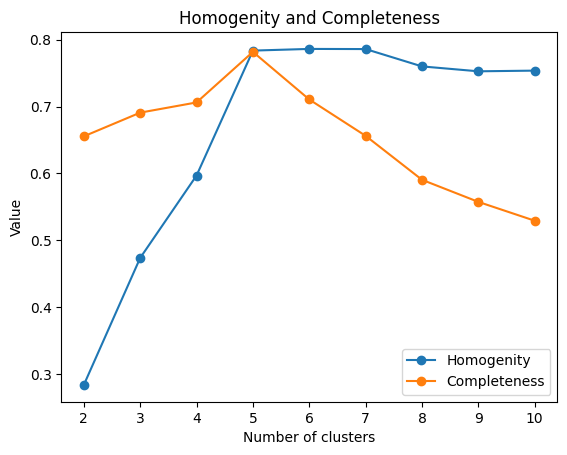

In [13]:
#----------------------homogeneity, completeness--------------------------------
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix, homogeneity_score, completeness_score
from sklearn.preprocessing import LabelEncoder
import numpy as np
import matplotlib.pyplot as plt

min_clusters = 2
max_clusters = 10


homogeneities_tsne = []
completenesses_tsne = []


for k in range(min_clusters, max_clusters+1):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(X_tsne)

    label_encoder = LabelEncoder()
    numeric_labels = label_encoder.fit_transform(df['category'])

    confusion_mat = confusion_matrix(numeric_labels, cluster_labels)
    
    homogeneity = homogeneity_score(numeric_labels, cluster_labels)
    homogeneities_tsne.append(homogeneity)
    
    completeness = completeness_score(numeric_labels, cluster_labels)
    completenesses_tsne.append(completeness)


plt.plot(range(min_clusters, max_clusters+1), homogeneities_tsne, marker='o', label='Homogenity')
plt.plot(range(min_clusters, max_clusters+1), completenesses_tsne, marker='o', label='Completeness')
plt.xlabel('Number of clusters')
plt.ylabel('Value')
plt.title('Homogenity and Completeness')
plt.legend()
